In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

titanic_df = pd.read_csv('titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### 데이터 설명
* Passengerid: 탑승자 데이터 일련번호
* **survived: 생존 여부, 0 = 사망, 1 = 생존 (target 값)** 
* Pclass: 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석
* sex: 탑승자 성별
* name: 탑승자 이름
* Age: 탑승자 나이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원수
* parch: 같이 탑승한 부모님 또는 어린이 인원수
* ticket: 티켓 번호
* fare: 요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

In [117]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [118]:
#titanic_df.describe() ## describe는 다른 조건 안주면, number형 컬럼만 찾아서 통계보여준다.
# titanic_df.describe().transpose()
titanic_df.describe().T # transpose() 줄임

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [119]:
891 - 714

177

In [120]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### NULL 컬럼들에 대한 처리
 1. Age : 177개가 Null값, 714개가 데이터 존재 -> 177개에 대해 평균치내서 채워주기. (데이터 개수가 적으니까)
 2. Cabin : 선실 번호 -> 204개 빼고 모두 결측치 -> 'N'으로 채워주기 (딱히 채워줄만한 정보가 없으니까)
 3. Embarked : 중간 정착 항구 -> 2개만 결측치 -> 'N'으로 채워주기

<AxesSubplot:xlabel='Age', ylabel='Density'>

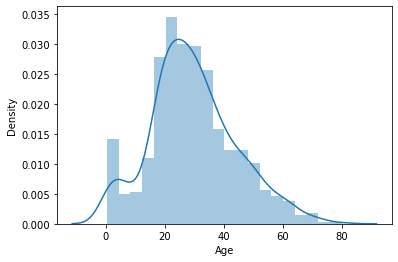

In [121]:
import seaborn as sns
sns.distplot(titanic_df.Age)

In [122]:
titanic_cabin = pd.DataFrame(titanic_df.Cabin.value_counts())
print(f"Cabin의 종류는 {titanic_cabin.shape[0]}개\n\n데이터 형태")
titanic_cabin.head()

Cabin의 종류는 147개

데이터 형태


,Cabin
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3


In [123]:
np.round(titanic_df['Age'].mean())

30.0

In [124]:
## 나이 fillna -> 30.0 (모두 .0으로 끝나서 반올림해줌)
titanic_df['Age'].fillna(np.round(titanic_df['Age'].mean()), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


### 주요 컬럼 EDA

In [125]:
# object 컬럼타입 추출
## titanic_df.dtypes는 컬럼별 type을 보여주는 시리즈형
titanic_df.dtypes[titanic_df.dtypes == 'object'].index.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

#### 데이터 분포 대략적으로 보기 (values_counts())

In [126]:
## 데이터 분포 대략적으로 보기 (values_counts())
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin(선실 번호) 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked(중간 정착 항구) 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin(선실 번호) 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked(중간 정착 항구) 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [127]:
titanic_df['Cabin'].str[:1].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

In [128]:
# Cabin컬럼(선실)에 대해, 맨 앞 첫글자로 대체
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [129]:
## Cabin(선실) 첫글자 대체 후, 데이터 분포 보기
titanic_df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

#### 성별과 생존여부 관계 확인

In [130]:
print(f"성별과 생존여부를 groupby해서 보기 {titanic_df.groupby(['Sex','Survived'])}")
titanic_df.groupby(['Sex','Survived']).Survived.count()

성별과 생존여부를 groupby해서 보기 <pandas.core.groupby.generic.DataFrameGroupBy object at 0x1793d5340>


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

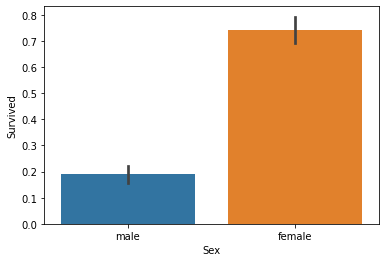

In [131]:
## y 축이 0과 1사이인 이유 -> Survived는 0과1로 이루어져있고, 평균내니 0과 1 사이값이된다.
sns.barplot(x='Sex', y='Survived', data=titanic_df)

#### 클래스별 생존여부 확인 (hue=성별)

**hue 인수에 카테고리 변수 이름을 지정하여, 카테고리 값에 따라 색상을 다르게 할 수 있다.**

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

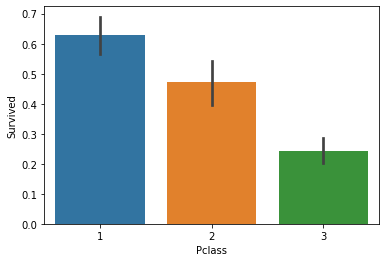

In [132]:
# 클래스별 생존도
sns.barplot(x='Pclass', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

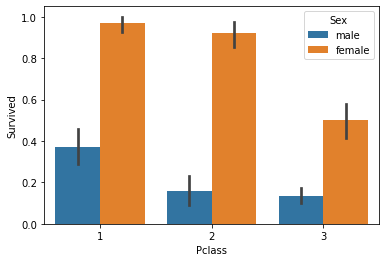

In [133]:
# hue 인수에 카테고리 변수 이름을 지정하여, 카테고리 값에 따라 색상을 다르게 할 수 있다.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

#### 나이와 생존여부 관계 확인 (hue=성별)

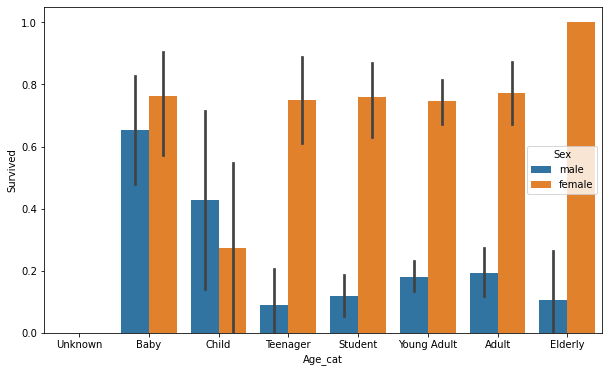

In [134]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

# get_category 함수를 Age 컬럼에 apply하여 카테고리 스트링으로 반환
titanic_df['Age_cat'] = titanic_df.Age.apply(get_category) # apply(lambda x : get_category(x)) 짧게
titanic_df.Age_cat.value_counts()

# 그래프의 크기 설정
plt.figure(figsize=(10,6))
# X축의 값의 순서(order) 지정해주기
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
# 그래프 그리기
sns.barplot(x='Age_cat', y='Survived',hue='Sex', data=titanic_df, order=group_names)
# 그래프 봤으니 Age_cat 컬럼 삭제
titanic_df.drop('Age_cat', axis=1, inplace=True) 

#### 인코딩 (LabelEncoder)

In [7]:
from sklearn.preprocessing import LabelEncoder

## 문자열 카테고리값을 숫자형 0, 1, 2, ... 레이블로 인코딩
features = ['Cabin', 'Sex', 'Embarked']
def encode_features(df):
    df = df.copy()
    le = LabelEncoder()
    for feature in features:
        df[feature] = le.fit_transform(df[feature])
    return df

titanic_df2 = encode_features(titanic_df)

In [8]:
## 인코딩 전
titanic_df[features].head(3)

,Cabin,Sex,Embarked
0,NaN,male,S
1,C85,female,C
2,NaN,female,S


In [9]:
## 인코딩 후
titanic_df2[features].head(3)

,Cabin,Sex,Embarked
0,147,1,2
1,81,0,0
2,147,0,2


### 원본 데이터 재로딩, feature, Label의 데이터 셋 추출
1. 위에서 preprocessing한 과정을 함수로 요약
- **fillna** (Null 처리) : Age, Cabin, Embarked Null처리
- **format_features** (Label Encoding) : Cabin, Sex, Embarked 문자열 -> 정수 레이블 인코딩
- **drop_features** (불필요한 피처 제거) : PassengerId, Name, Ticket 피처 제거

In [10]:
from sklearn.preprocessing import LabelEncoder

# Null 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    return df
# 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df
# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1] # 첫글자로 대체
    features = ['Cabin','Sex','Embarked']
    for f in features:
        le = LabelEncoder()
        df[f] = le.fit_transform(df[f])
    return df
# 앞에서 설정한 Data Preprocessing 함수들 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [11]:
# 원본 데이터 재로딩
titanic_df = pd.read_csv('titanic/train.csv')
# feature데이터셋 과 Taget데이터셋 추출
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1) # default inplace=False
# Data Preprocessing 함수 호출
X_titanic_df = transform_features(X_titanic_df)

In [12]:
## Preprocessing 결과 feature Data set
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2, random_state=11)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


### 3가지 머신러닝 모델로 학습/예측/평가
1. DecisionTreeClassifier
2. RandomForestClassifier
3. LogisticRegression

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f"DecisionTreeClassifier 정확도 : {accuracy_score(y_test, dt_pred):.2%}")

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForestClassifier 정화도 : {accuracy_score(y_test, rf_pred):.2%}")

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogisticRegression  정확도  : {accuracy_score(y_test, lr_pred):.2%}")

DecisionTreeClassifier 정확도 : 78.77%
RandomForestClassifier 정화도 : 85.47%
LogisticRegression  정확도  : 86.59%


In [17]:
# DataFrame에서 index를 통해, 행 불러오기
X_titanic_df.values[[0, 1, 2, 3, 4, 5]]

array([[ 3.        ,  1.        , 22.        ,  1.        ,  0.        ,
         7.25      ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 38.        ,  1.        ,  0.        ,
        71.2833    ,  2.        ,  0.        ],
       [ 3.        ,  0.        , 26.        ,  0.        ,  0.        ,
         7.925     ,  7.        ,  3.        ],
       [ 1.        ,  0.        , 35.        ,  1.        ,  0.        ,
        53.1       ,  2.        ,  3.        ],
       [ 3.        ,  1.        , 35.        ,  0.        ,  0.        ,
         8.05      ,  7.        ,  3.        ],
       [ 3.        ,  1.        , 29.69911765,  0.        ,  0.        ,
         8.4583    ,  7.        ,  2.        ]])

### KFold를 이용한 정확도 예측

In [222]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold 객체 생성
    kfold = KFold(n_splits=folds)
    # 폴드 수만큼 예측 결과 정확도 저장할 리스트
    scores = []
    print(f">>> {clf} 모델")
    # KFold 교차 검증 수행.
    for cnt, (train_idx, test_idx) in enumerate(kfold.split(X_titanic_df),1):
        # X_titanic_df에서 교차 검증별로 학습/검증 데이터 셋 분리
        X_train, X_test = X_titanic_df.values[train_idx], X_titanic_df.values[test_idx]
        y_train, y_test = y_titanic_df.values[train_idx], y_titanic_df.values[test_idx]
        
        # Classifier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc = accuracy_score(y_test, pred)
        scores.append(acc)
        print(f"  교차 검증{cnt} 정확도: {acc:.2%}")
    print(f"  평균 검증 정확도: {np.mean(scores):.2%}\n")
# DecisionTreeClassifier -> exec_kfold 호출
exec_kfold(dt_clf, folds=5)
exec_kfold(rf_clf, folds=5)
exec_kfold(lr_clf, folds=5)

>>> DecisionTreeClassifier(random_state=11) 모델
  교차 검증1 정확도: 75.42%
  교차 검증2 정확도: 78.09%
  교차 검증3 정확도: 78.65%
  교차 검증4 정확도: 76.97%
  교차 검증5 정확도: 82.02%
  평균 검증 정확도: 78.23%

>>> RandomForestClassifier(random_state=11) 모델
  교차 검증1 정확도: 79.33%
  교차 검증2 정확도: 80.90%
  교차 검증3 정확도: 83.71%
  교차 검증4 정확도: 77.53%
  교차 검증5 정확도: 85.96%
  평균 검증 정확도: 81.48%

>>> LogisticRegression(solver='liblinear') 모델
  교차 검증1 정확도: 79.33%
  교차 검증2 정확도: 79.21%
  교차 검증3 정확도: 77.53%
  교차 검증4 정확도: 74.72%
  교차 검증5 정확도: 84.27%
  평균 검증 정확도: 79.01%



### cross_val_score를 이용한 예측

In [223]:
from sklearn.model_selection import cross_val_score
def exec_cross_val_score(clf, folds=5):
    print(f">>> {clf} 모델")
    scores = cross_val_score(clf, X_titanic_df, y_titanic_df, cv=folds)
    for cnt, acc in enumerate(scores,1):
        print(f"  교차 검증{cnt} 정확도: {acc:.2%}")
    print(f"  평균 정확도: {np.mean(scores):.2%}\n")

exec_cross_val_score(dt_clf)
exec_cross_val_score(rf_clf)
exec_cross_val_score(lr_clf)

>>> DecisionTreeClassifier(random_state=11) 모델
  교차 검증1 정확도: 74.30%
  교차 검증2 정확도: 77.53%
  교차 검증3 정확도: 79.21%
  교차 검증4 정확도: 78.65%
  교차 검증5 정확도: 84.27%
  평균 정확도: 78.79%

>>> RandomForestClassifier(random_state=11) 모델
  교차 검증1 정확도: 79.33%
  교차 검증2 정확도: 79.78%
  교차 검증3 정확도: 84.83%
  교차 검증4 정확도: 76.40%
  교차 검증5 정확도: 86.52%
  평균 정확도: 81.37%

>>> LogisticRegression(solver='liblinear') 모델
  교차 검증1 정확도: 78.77%
  교차 검증2 정확도: 79.21%
  교차 검증3 정확도: 77.53%
  교차 검증4 정확도: 76.40%
  교차 검증5 정확도: 82.02%
  평균 정확도: 78.79%



### GridSearchCV를 이용한 예측

In [240]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,5,8]}

def treeGrid(clf, folds=5):
    grid_clf = GridSearchCV(clf, param_grid=parameters, scoring='accuracy', cv=folds)
    grid_clf.fit(X_train, y_train)
    print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_clf.best_params_}")
    print(f"GridSearchCV 학습데이터 최고 정확도: {grid_clf.best_score_:.2%}")
    best_clf = grid_clf.best_estimator_
    # GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측/평가 수행
    dpredictions = best_clf.predict(X_test)
    acc = accuracy_score(y_test, dpredictions)
    print(f"테스트 세트에서 {clf} 모델 정확도 : {acc:.2%}\n")

In [241]:
treeGrid(dt_clf)
treeGrid(rf_clf)

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 학습데이터 최고 정확도: 79.92%
테스트 세트에서 DecisionTreeClassifier(random_state=11) 모델 정확도 : 87.15%

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
GridSearchCV 학습데이터 최고 정확도: 81.46%
테스트 세트에서 RandomForestClassifier(random_state=11) 모델 정확도 : 88.27%

